In [1]:
## Author: Juan Maroñas (juan.maronnas@uam.es). Machine Learning Group, Universidad Autónoma de Madrid
## Deep into Prophet through Tutorials

## What are the default parameters and important methods on instantiation. Infered by looking at the source code
#  Perhaps I miss something, you should check source code. 

In [2]:
## Python
import os

## Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

usetex = mpl.checkdep_usetex(True)

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': usetex,
    'pgf.rcfonts': False,
    'xtick.bottom': True,
    'xtick.labelbottom': True,
    'ytick.left': True,
    'ytick.labelleft': True,
})

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb,amsfonts,amsthm}'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25


## Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

usetex mode requires TeX.


In [3]:
## Read data
data_dir = os.path.join('../data/','example_air_passengers.csv') 
df       = pd.read_csv(data_dir)

# cast to datetime type
df['ds_plot'] = df['ds']
df['ds']      = pd.to_datetime(df['ds'])

Text(0.5, 1.0, 'Whole temporal serie')

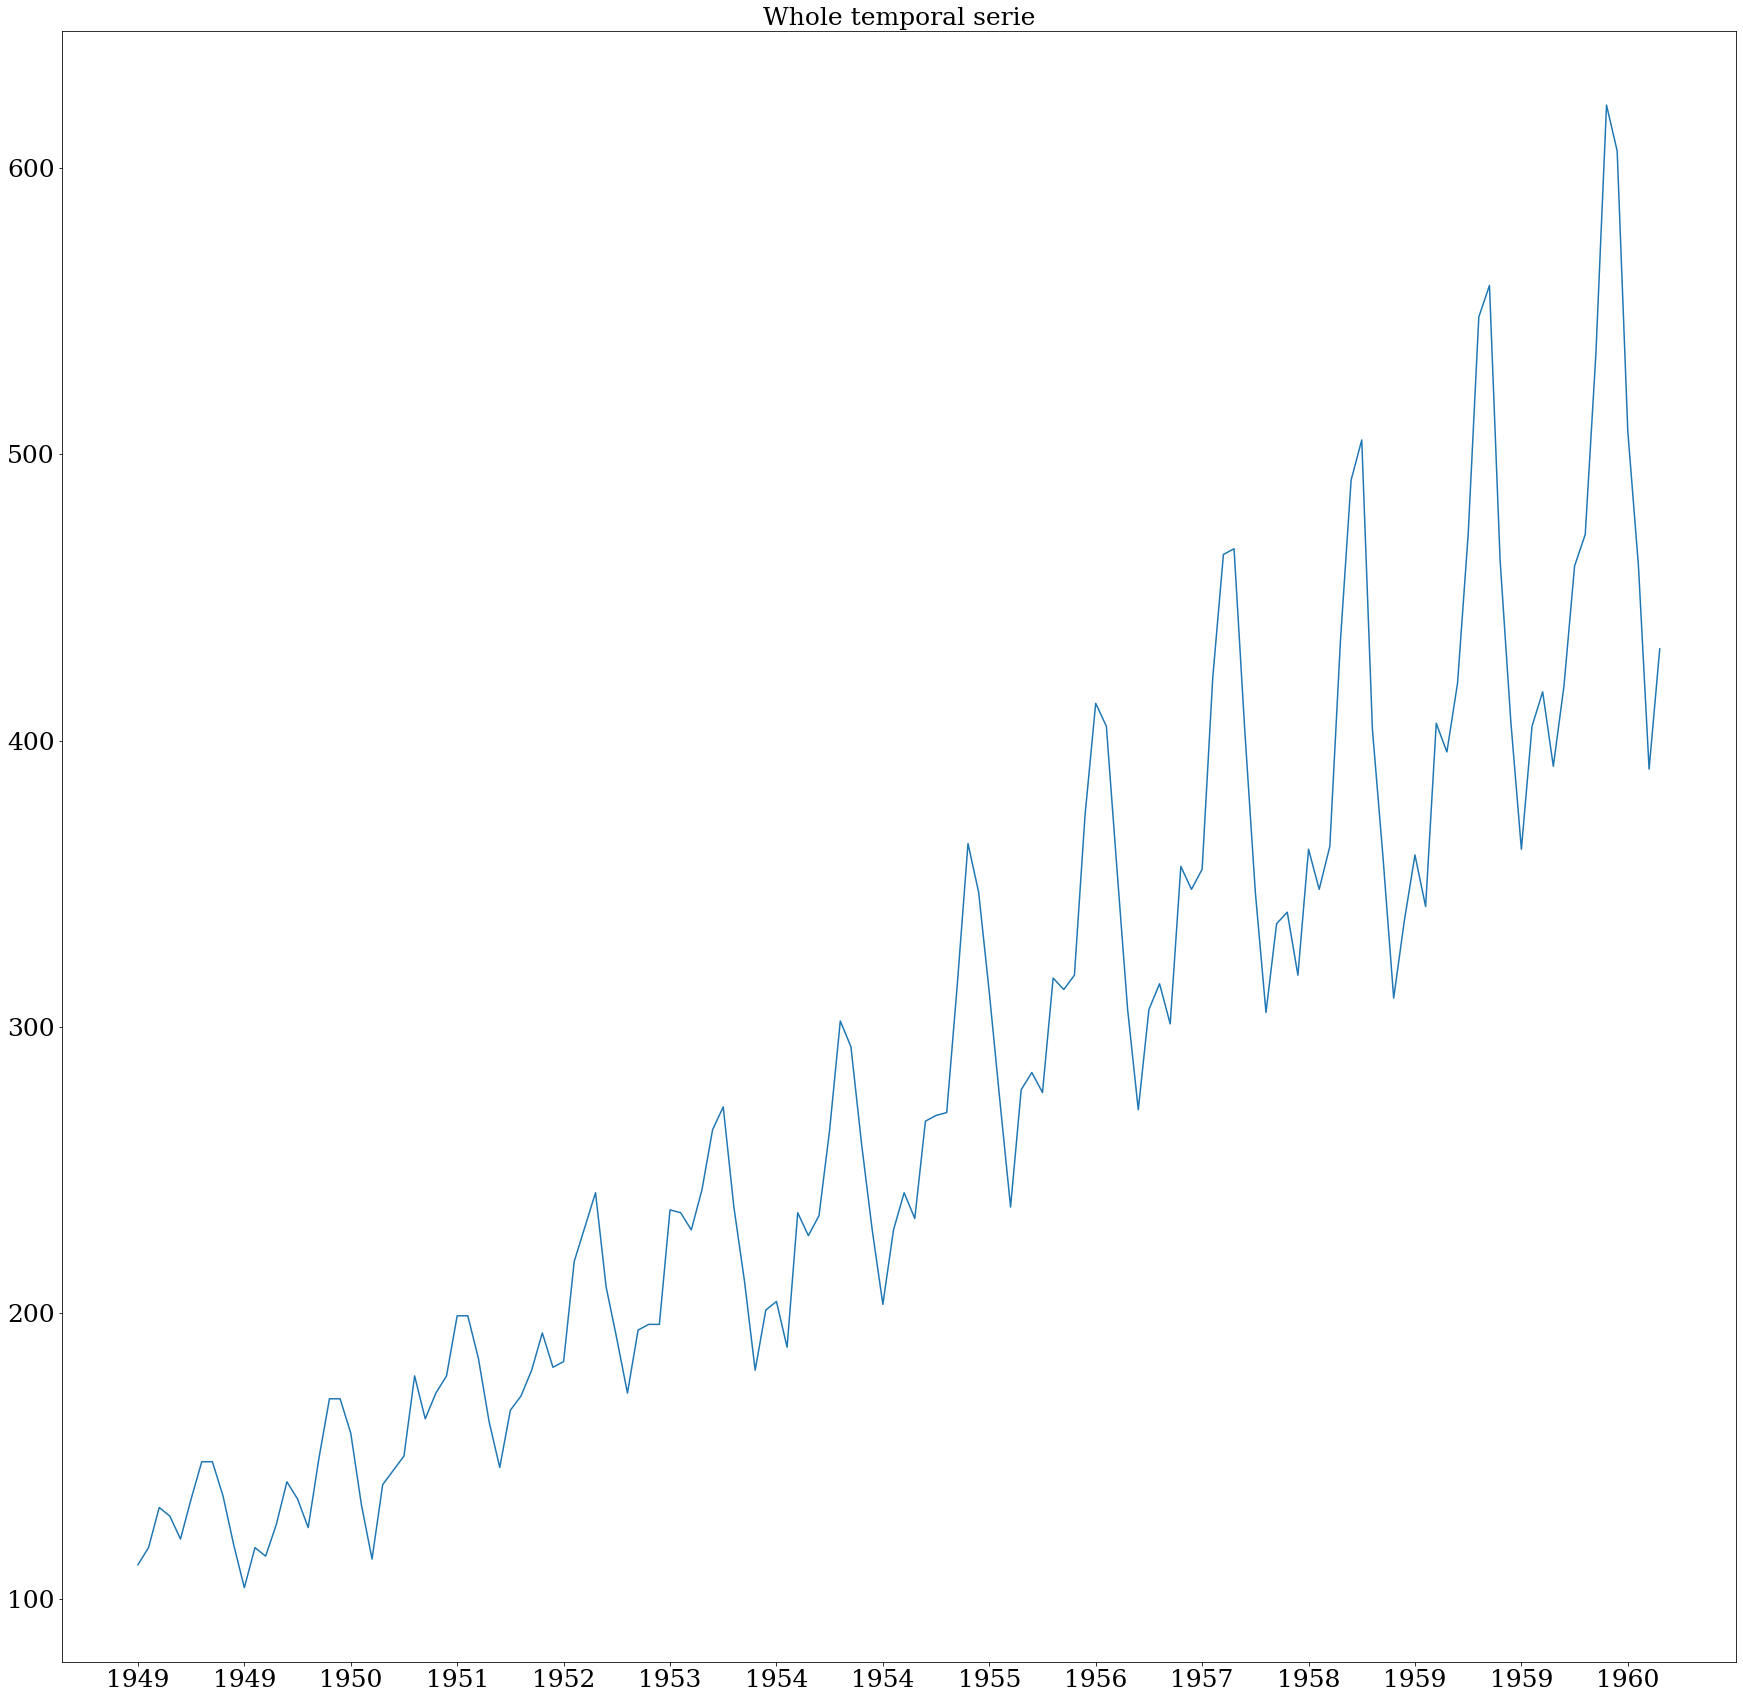

In [4]:
## Visualize whole series
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df['y']))

ax.plot(x,df['y'])
ax.set_xticks(x[0::10], labels = df['ds'].dt.year[0::10])
ax.set_title('Whole temporal serie')

In [7]:
model = Prophet(
                growth                 = 'linear',    # Can be logistic or flat as well. 
                changepoints           = None,        # list where change points appear. If not specified, then infered automatically 
                n_changepoints         = 25,          # number of default initial change points that are infered automatically. This 
                                                      # are then prune.
                changepoint_range      = 0.8,         # Proportion of history where trend change points are estimated. Prophet
                                                      # has a method to infere where future changepoints are located when making
                                                      # predictions. Check paper.
                yearly_seasonality        = 'auto',   # can be True, False or a number specifying the fourier terms to estimate.
                weekly_seasonality      = 'auto',
                daily_seasonality       = 'auto',
                holidays                = None,       # Pandas df specifying holidays or a range of dates considered holidays. Check jupyter for that.
                                                      # Prior scale on this parameters is set through holidays_prior_scale. It
                                                      # is an L2.
                
                seasonality_mode        = 'additive', # Additive or multiplicative
            
            
                seasonality_prior_scale = 10.0,       # L2 prior scale for seasonality
                holidays_prior_scale    = 10.0,       # L2 prior scale for holidays
    
                changepoint_prior_scale = 0.05,       # L1 prior scale for changes in rates
    
                mcmc_samples        = 0,              # if > 0 then samples from the posterior over the parameters
                                                      #   are drawn using NUTS (https://jmlr.org/papers/v15/hoffman14a.html),
                                                      #   otherwise fit a point estimate
                interval_width      = 0.80,           # quantile specification
                uncertainty_samples = 1000,           # number of samples drawn from the model to estimate quantiles.
                
                stan_backend = None,                  # stan backend to use. Recomend cmdstan         
                )

In [ ]:
## Add seasonality
model.add_seasonality(
                        name = 'sub_daily_data',   # Name used by prophet.
                        period = 0.5               # float number specifying dates. This example implies a 12 hour seasonality model
                        fourier_order = 50         # number of fourier elements in the series
                        mode          = 'additive' # Or multiplicative. Note this allows you to use additive monthly seasonality
                                                   #    and multiplicative year seasonality. Defaults to seasonality_mode.
                        prior_scale   = 0.5        # Scale of the Gaussian prior (L2). This allows you to use
                                                   #     different prior scales on different seasonalities.
                        condition_name = 'blabla'  # Seasonality condition. Check the corresponding jupyter 
                                                   #    for its usage.
                     )

In [ ]:
## Add regresor method: to add the famous additional regressors.
model.add_regressor(
                        name        = 'regressor_1',
                        prior_scale = 0.05           # L2
                        standarize  = 'auto',        # Can be True or False. 'Auto' applies standard normalization
                                                     #    if data is not binary.
                        mode         = 'additive'    # or multiplicative. Defaults to seasonality_mode.
                    )

In [ ]:
# There are other methods, check github, these tutorials and prophet tutorials. Beyond fit and predict, this are
# the most revealing methods to understand prophet's internal usage. The rest of the methods are more like helper methods.